La longueur moyenne doit être supérieur à l'entropie pour ne pas avoir d'erreur de transmission. 

L'entropie vaut : - Somme(pn * log pn) Shannon/Symbole

Longeur moyenne : Somme(pn*ln) bit/symbole

TP2 : 

Q1 : 30 

Q2 : 2

Q3 : Non l'alphabet n'est pas équiprobable car certaines lettres apparraissent plus fréquement que d'autres

Les symboles du canal doivent être équiprobable pour avoir le max d'nformation

Q4 : 

In [20]:
import numpy as np

proba_fr = np.loadtxt("probas.csv",delimiter=",",usecols=(1),skiprows=1)

entropie_fr = -np.sum(proba_fr*np.log2(proba_fr))

print("Entropie FR : "+ str(entropie_fr) + "Sh/symbol")

proba_en = np.loadtxt("probas.csv",delimiter=",",usecols=(2),skiprows=1)

entropie_en = -np.sum(proba_en*np.log2(proba_en))

print("Entropie EN : "+str(entropie_en) + "Sh/symbol")



Entropie FR : 4.088848086077461
Entropie EN : 4.181588456864605


Q5 : La capacité canal vaut 100 MSh/s

Q6 : Pour bien transettre il faut que le Taux d'émission soit > au Débit CANAL 

Alors Tc <= 100 MSh/s

In [158]:
proba_fr = np.loadtxt("probas.csv",delimiter=",",usecols=(1),skiprows=1)

print("Durée de transmission : "+str((16000*8)/100E6)+ "s")

code = komm.HuffmanCode(proba_fr)

lm_huff=0
cpt=0

for i in list(code.enc_mapping.values()):
    lm_huff += len(i)*proba_fr[cpt]
    cpt+=1

print("Longeur moyenne de Huff : "+str(lm_huff))

print("Durée de transmission de Huff : "+str((16000*4.12)/100E6)+ "s")




Durée de transmission : 0.00128s
Longeur moyenne de Huff : 4.120696577336143
Durée de transmission : 0.0006592s


Code Huffman deuxième version 

Compression d'une image 

Q1 : Taille de l'alphabet de la source : 256 niveaux de gris possible

Q2 : Les symboles de la source sont considéré comme équiprobables 

Q3 : En entropie de la source : log2(256) = 8 Sh/symbole

Q4 : Longeur moyenne : 8 bits par niveaux de gris car (théorème de shanon H<L entropie doit etre inférieur à la longeur moyenne)

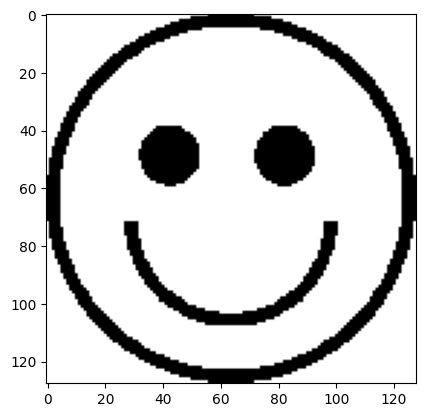

Taille image compressée : 1366
Taille image originel : 16384
Taux de compression : 8.33740234375%


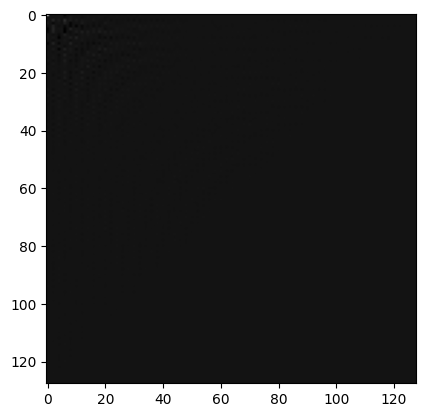

RSB : -21.717260159505393 dB


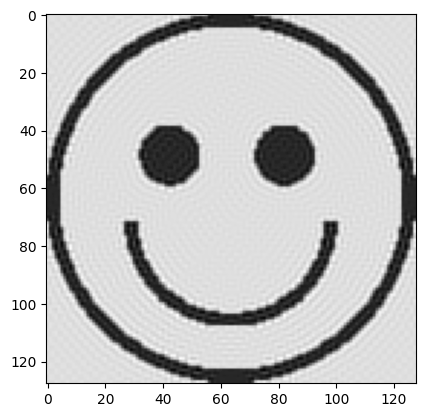

In [271]:
import skimage.io
import matplotlib.pyplot
import comnumfip

import scipy


image = skimage.io.imread("smiley.png")
image_compressed = comnumfip.rleenc(image.ravel())
image_decompressed=comnumfip.rledec(image_compressed)
img = np.reshape(image_decompressed, (128,128))  
matplotlib.pyplot.imshow(img, cmap="gray")
matplotlib.pyplot.show()

print("Taille image compressée : "+str(len(image_compressed)))
print("Taille image originel : "+str(128*128))
print("Taux de compression : "+str((len(image_compressed)/(128*128))*100)+"%")

I=scipy.fftpack.dctn(image, norm='ortho')
M, N = I.shape              # Taille de la DCT I
m = np.arange(M)            # Liste des indices des lignes
n = np.arange(N)            # Liste des indices des colonnes
X, Y = np.meshgrid(m,n)     # Matrices des coordonnées
F = 0.5               # Facteur de compression (entre 0 et 1)
mask = ((X+Y) < 2*M*F)      # Définit un masque triangulaire
J = I*mask                  # Masquage de l'image

matplotlib.pyplot.imshow(J, cmap="gray")
matplotlib.pyplot.show()

decompression = scipy.fftpack.idctn(J, norm='ortho')
rsb=0
pb=0 

#SNR calculation between the original image and the decompressed image
SNR=0
SNR=10*np.log10(np.linalg.norm(image-decompression)**2/np.linalg.norm(image)**2)

print("RSB : "+str(SNR)+" dB")
matplotlib.pyplot.imshow(decompression, cmap="gray")
matplotlib.pyplot.show()